# Задание_1

###### Импортируйте библиотеки pandas, numpy и matplotlib. Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. Создайте датафреймы X и y из этих данных. Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
from sklearn.datasets import load_boston

In [5]:
boston=load_boston()

In [7]:
data=boston.data

In [10]:
target=boston.target

In [11]:
feature_names = boston.feature_names

In [13]:
X = pd.DataFrame(data, columns = feature_names)

In [16]:
y = pd.DataFrame(target, columns = ['price'])

In [18]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state = 42)

###### Масштабируйте данные с помощью StandardScaler.

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()

In [23]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

###### Постройте модель TSNE на тренировочный данных с параметрами: n_components=2, learning_rate=250, random_state=42. Постройте диаграмму рассеяния на этих данных.

In [25]:
from sklearn.manifold import TSNE

In [26]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [27]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

In [28]:
X_train_tsne.shape

(404, 2)

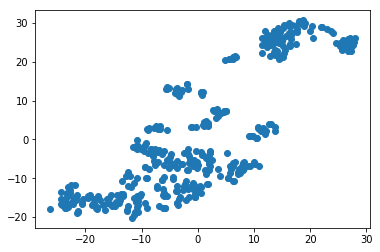

In [32]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1])

# Задание_2

###### С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train. Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

In [33]:
from sklearn.cluster import KMeans

In [41]:
? kmeans

In [42]:
kmeans = KMeans(n_clusters = 3, max_iter = 100, random_state = 42)

In [43]:
label_train = kmeans.fit_predict(X_train_scaled)

In [44]:
label_train

array([1, 2, 0, 1, 2, 2, 2, 0, 1, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 0, 1, 2,
       0, 2, 0, 2, 1, 0, 2, 0, 2, 2, 1, 1, 2, 0, 0, 2, 2, 0, 0, 2, 1, 2,
       1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 1, 1, 1, 1, 0, 2, 1, 1, 1, 0,
       1, 2, 2, 1, 1, 0, 0, 2, 1, 1, 2, 1, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2,
       1, 0, 2, 0, 0, 1, 1, 1, 2, 2, 2, 1, 1, 2, 0, 1, 1, 0, 0, 1, 0, 2,
       2, 2, 2, 1, 2, 0, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 0, 2,
       0, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 0, 0, 2, 0, 2, 2, 0, 0, 1, 0, 0,
       1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2,
       2, 2, 1, 1, 2, 2, 2, 1, 0, 2, 2, 2, 2, 0, 2, 1, 2, 1, 0, 1, 2, 1,
       1, 1, 1, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2, 2, 2, 1, 1, 0, 2, 2, 0,
       0, 1, 1, 2, 0, 1, 1, 2, 0, 0, 1, 2, 0, 1, 2, 2, 1, 2, 1, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 1, 2, 1, 2, 2, 0, 2, 1, 1, 0, 1, 2, 1, 2, 2,
       1, 0, 0, 2, 1, 0, 1, 1, 1, 2, 0, 1, 2, 2, 2,

In [45]:
pd.value_counts(label_train)

2    191
1    127
0     86
dtype: int64

###### Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами.

Text(-10, 28, 'Classter 1')

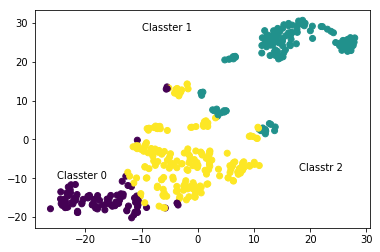

In [48]:
plt.scatter(X_train_tsne[:,0],X_train_tsne[:,1], c=label_train)
plt.text(-25,-10, 'Classter 0')
plt.text(18,-8, 'Classter 2')
plt.text(-10,28, 'Classter 1')

###### Вычислите средние значения price и CRIM в разных кластерах.

In [51]:
X_train.loc[label_train==0, 'CRIM'].mean()

0.07356558139534886

In [53]:
X_train.loc[label_train==1, 'CRIM'].mean()

10.797028425196853

In [54]:
X_train.loc[label_train==2, 'CRIM'].mean()

0.42166020942408367

In [88]:
? plt.hist

In [76]:
y_train.mean()

price    22.796535
dtype: float64

In [77]:
y_train[label_train==0].mean()

price    27.788372
dtype: float64

In [78]:
y_train[label_train==1].mean()

price    16.165354
dtype: float64

In [79]:
y_train[label_train==2].mean()

price    24.958115
dtype: float64

# Задание_3

###### Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора. Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [97]:
label_test = kmeans.fit_predict(X_test_scaled)

In [98]:
label_test

array([1, 0, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 0, 2, 1, 0,
       1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 2, 1, 1, 2, 1, 1, 0, 1, 1, 0, 2, 2, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       2, 1, 0, 2, 1, 2, 2, 0, 1, 2, 1, 0, 2, 2, 1, 2, 0, 2, 1, 1, 2, 1,
       1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1])

In [99]:
pd.value_counts(label_test)

1    53
2    35
0    14
dtype: int64

In [102]:
X_test.loc[label_test==0, 'CRIM'].mean()

0.08618571428571427

In [103]:
X_test.loc[label_test==1, 'CRIM'].mean()

0.25200716981132076

In [104]:
X_test.loc[label_test==2, 'CRIM'].mean()

10.165531142857143

In [106]:
y_test[label_test==0].mean()

price    33.871429
dtype: float64

In [107]:
y_test[label_test==1].mean()

price    21.55283
dtype: float64

In [108]:
y_test[label_test==2].mean()

price    16.437143
dtype: float64